# Evaluation Project: Loan Application Status Prediction
    
Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:

1.Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

2.Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

3.Married - This refers to applicant being in a state of matrimony

4.Dependents - This refres to persons who depends on the applicants for survival

5.Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university

6.Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer

7.Applicant Income - This refers to disposable income available for the applicant's use under State law.

8.CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.

9.Loan_Amount - This refers to the amount of money an applicant owe at any given time.

10.Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant

11.Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.

12.Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

13.Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

# By: Udit Lakhoria

Importing important and required libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

Importing Dataset

In [2]:
ds=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
ds.shape

(614, 13)

# Dataset contains 614 rows and 13 columns

In [4]:
ds.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


lets see the columns present in the dataset to get a better insights about the dataset

In [6]:
ds.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Lets check the datatype of columns present in the dataset

In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are 4 columns of float datatype, 1 column of Int datatype and 8 columns of object datatype

Checking intregity of the data. Starting with checking missing values

<AxesSubplot:>

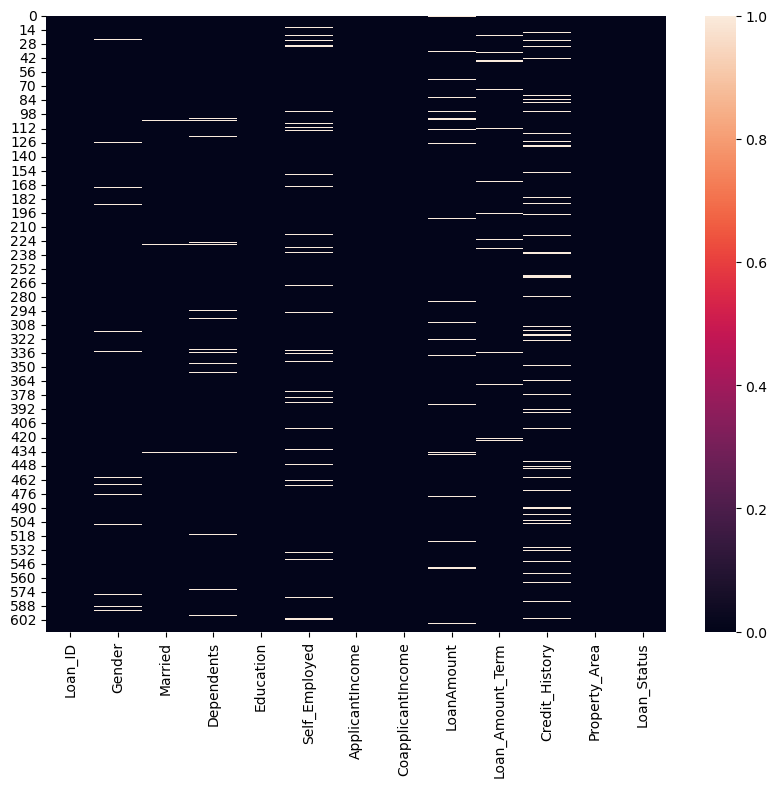

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(ds.isnull())

# Observations:
    
We can observe Gender, Married, dependents, self_employed, LoanAmount, credit_History, and Loan_Amount_term column contain missing values

In [13]:
missing_values = ds.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(ds))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Credit_History                 50        8.143322
Self_Employed                  32        5.211726
LoanAmount                     22        3.583062
Dependents                     15        2.442997
Loan_Amount_Term               14        2.280130
Gender                         13        2.117264
Married                         3        0.488599
Loan_ID                         0        0.000000
Education                       0        0.000000
ApplicantIncome                 0        0.000000
CoapplicantIncome               0        0.000000
Property_Area                   0        0.000000
Loan_Status                     0        0.000000


# Observation

Out of the 13 columns, 7 have missing values.

Since there is just a little quantity of missing data, we utilise mean and mode to replace it with NaN values.

# Way forward
Before we look into missing value imputation, let's discuss categorical features.

Start by listing Value counts and possible Sub-categories for various categorial features.

In [15]:
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    print(i)
    print(ds[i].value_counts())
    print('='*100)

Gender
Male      489
Female    112
Name: Gender, dtype: int64
Married
Yes    398
No     213
Name: Married, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64


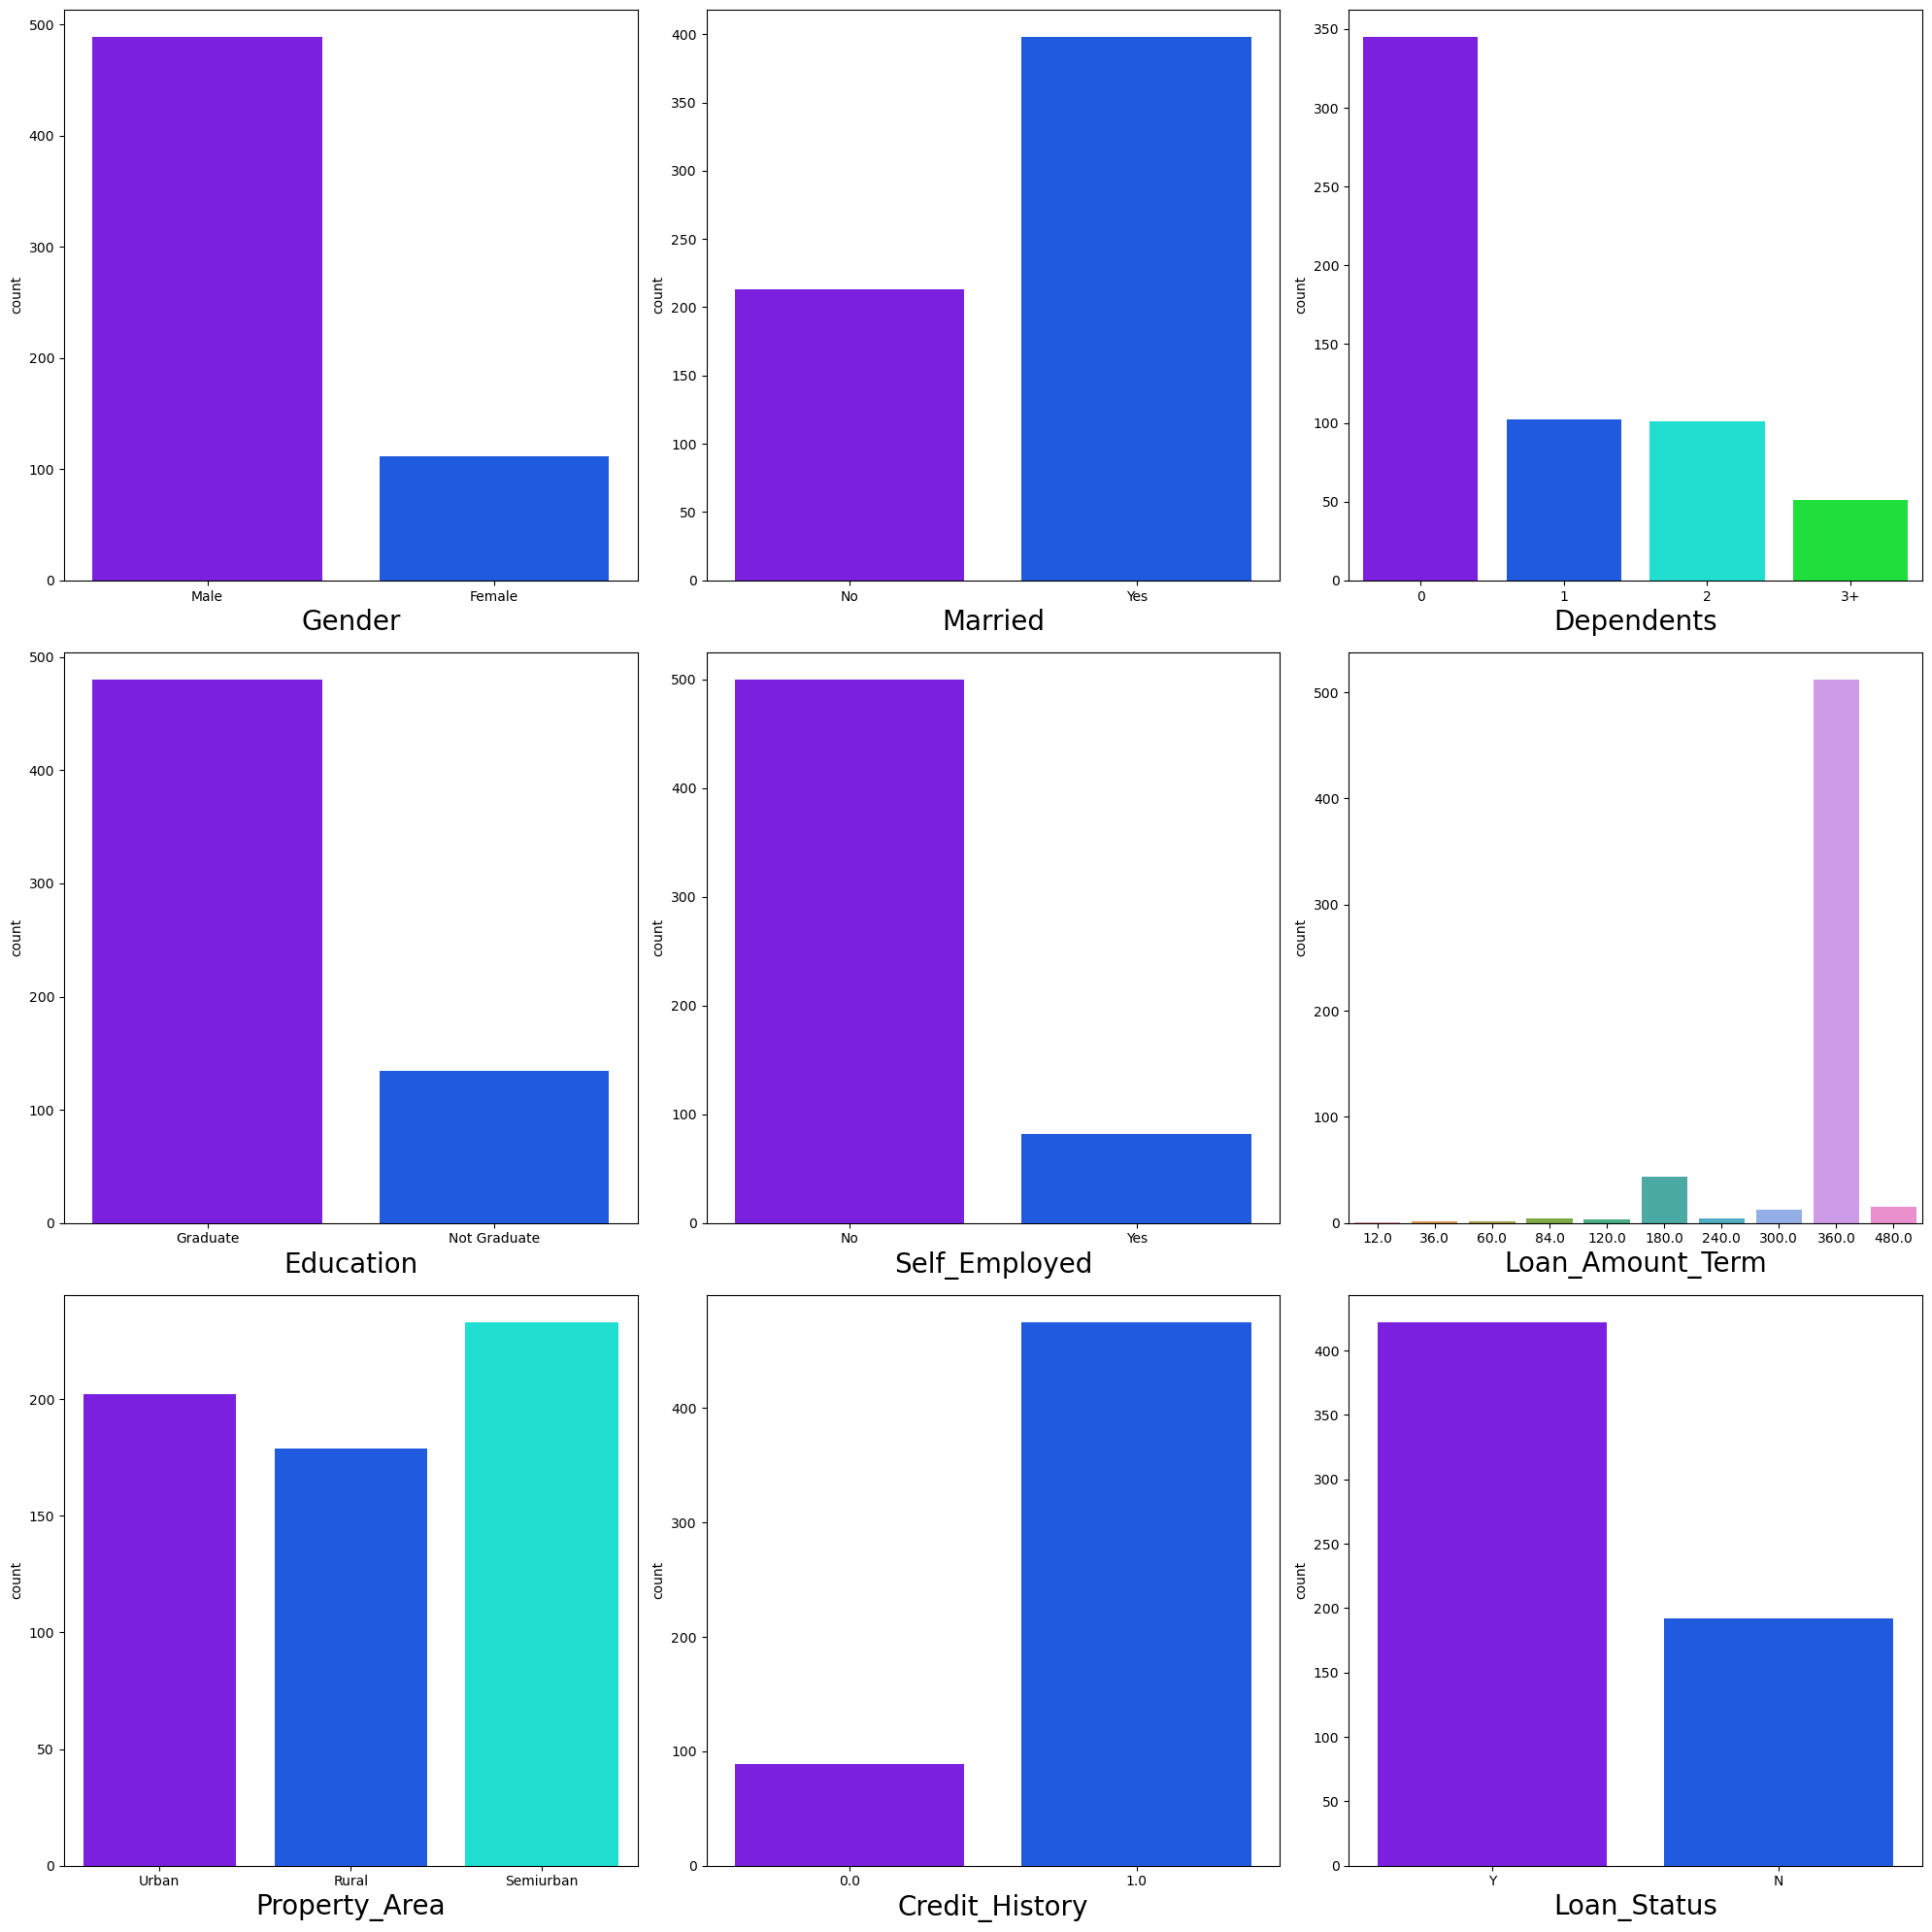

In [16]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(ds[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()


# Observations:
    
Eighty percent of all loan applicants are men. We can investigate the loan amounts for each gender that applies and determine whether or not loans are granted for each gender on the same grounds.

Among applicants, just 20% are self-employed. The relationship between applicant income and loan acceptance for the non-self employed group will thus be fascinating to learn about. In order to approve loans, we shall search for any benchmark range of income.We'll also look for a benchmark on the borrowing requirements for these two categories.

Nearly 70% of loan applicants are married, and 75% are graduates.

Nearly 60% of the candidates are single.

After semi-urban areas, urban areas and rural areas are where most applications hail from.


# Imputating missing values in categorical columns with the mode of the respective column

# And For numerical columns replacing with mean or median

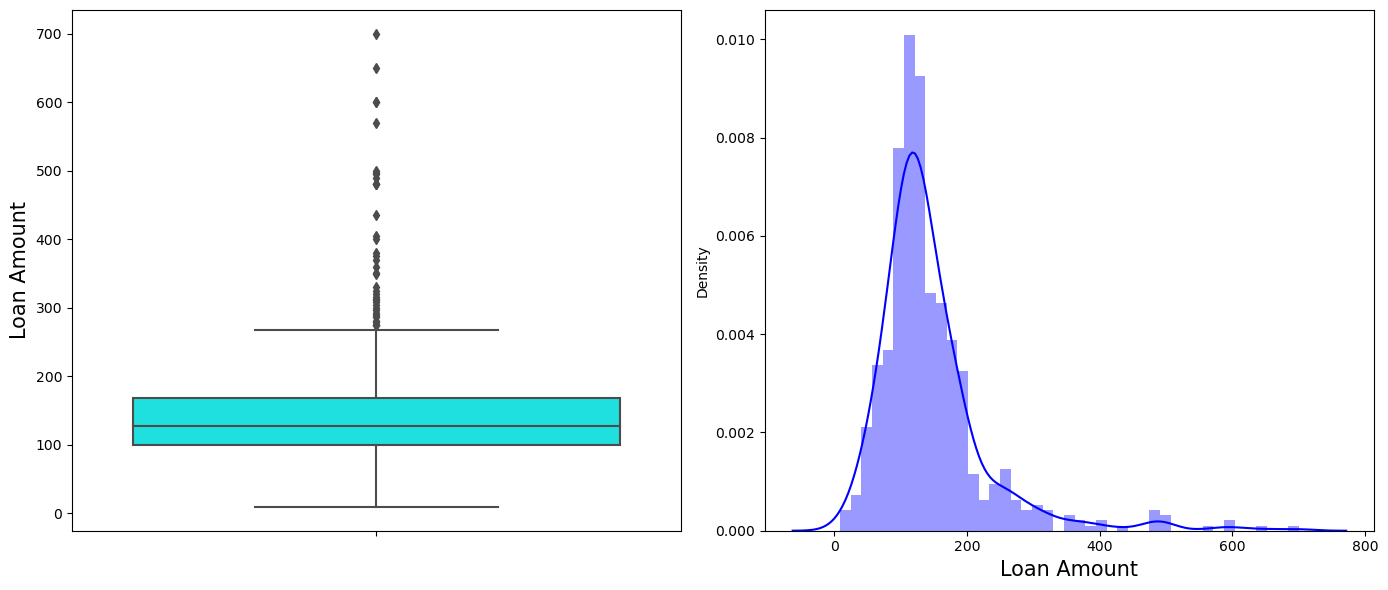

In [19]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='LoanAmount', data=ds,color='cyan')
plt.ylabel('Loan Amount',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(ds['LoanAmount'], color='b')
plt.xlabel('Loan Amount',fontsize=15)
plt.tight_layout()
plt.show()

In [20]:
print("Mean of Loan Amount:",ds['LoanAmount'].mean())
print("Median of Loan Amount:",ds['LoanAmount'].median())

Mean of Loan Amount: 146.41216216216216
Median of Loan Amount: 128.0


# Observations:
    
The median loan amount is lower than the mean.

Outliers are clearly visible in the boxplot, and the feature in the distribution plot is stretched too much.

We will substitute missing values for loan amount with the median because severe outliers are present in the feature and the data is more sensitive to mean as a result.

Imputation of Missing values

In [22]:
# Imputating Missing value with mode for categorical features
ds['Credit_History'].fillna(ds['Credit_History'].mode()[0],inplace=True)
ds['Self_Employed'].fillna(ds['Self_Employed'].mode()[0],inplace=True)
ds['Dependents'].fillna(ds['Dependents'].mode()[0], inplace=True)
ds['Gender'].fillna(ds['Gender'].mode()[0],inplace=True)
ds['Married'].fillna(ds['Married'].mode()[0],inplace=True)

# Imputation of Numerical features
ds['Loan_Amount_Term'].fillna(ds['Loan_Amount_Term'].mode()[0],inplace=True)
ds['LoanAmount'].fillna(ds['LoanAmount'].median(), inplace=True)

In [24]:
#Again Checking the missing values
missing_values = ds.isnull().sum().sort_values(ascending = False)
missing_values

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# We have successfully replaced all the missing values from the dataset. Lets move ahead

<AxesSubplot:>

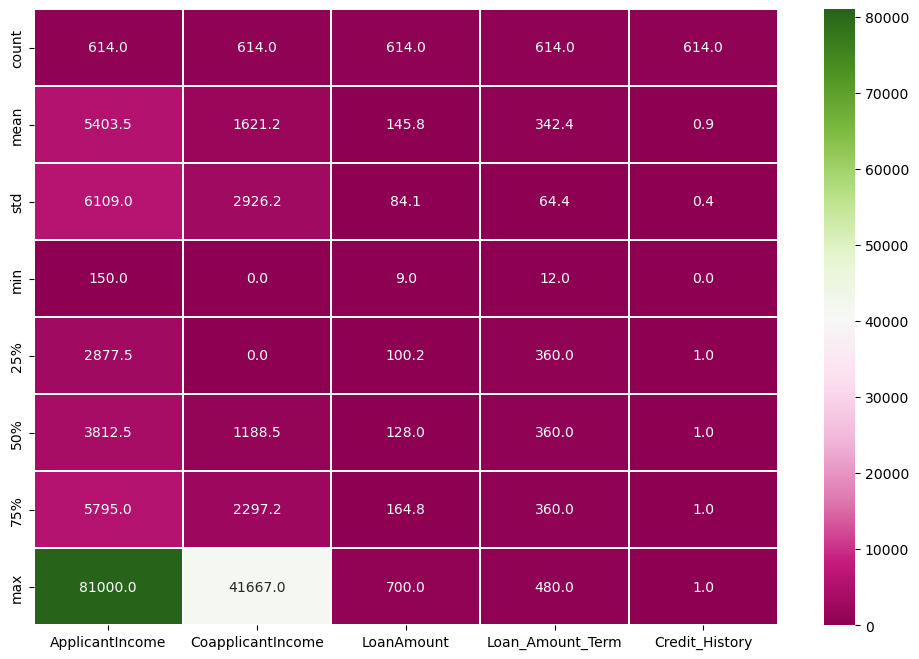

In [26]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(12,8))
sns.heatmap(ds.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [28]:
ds.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# Observations:
    
The standard deviation number for applicant and coapplicant income is higher than the median. Data is so dispersed and biassed.

We can categorically state that Outliers exist in Applicant Income, Coapplicant Income, and Loan Amount when 75% and Max rows are taken into account.

There is no importance in the various statistical parameters of credit history because it is a categorical variable.

The minimum loan term is 12 months, and the maximum term is 480 months.

150 is the minimum and 81000 is the maximum applicant income.

# Comaparing Target Variable with the feature. one by one

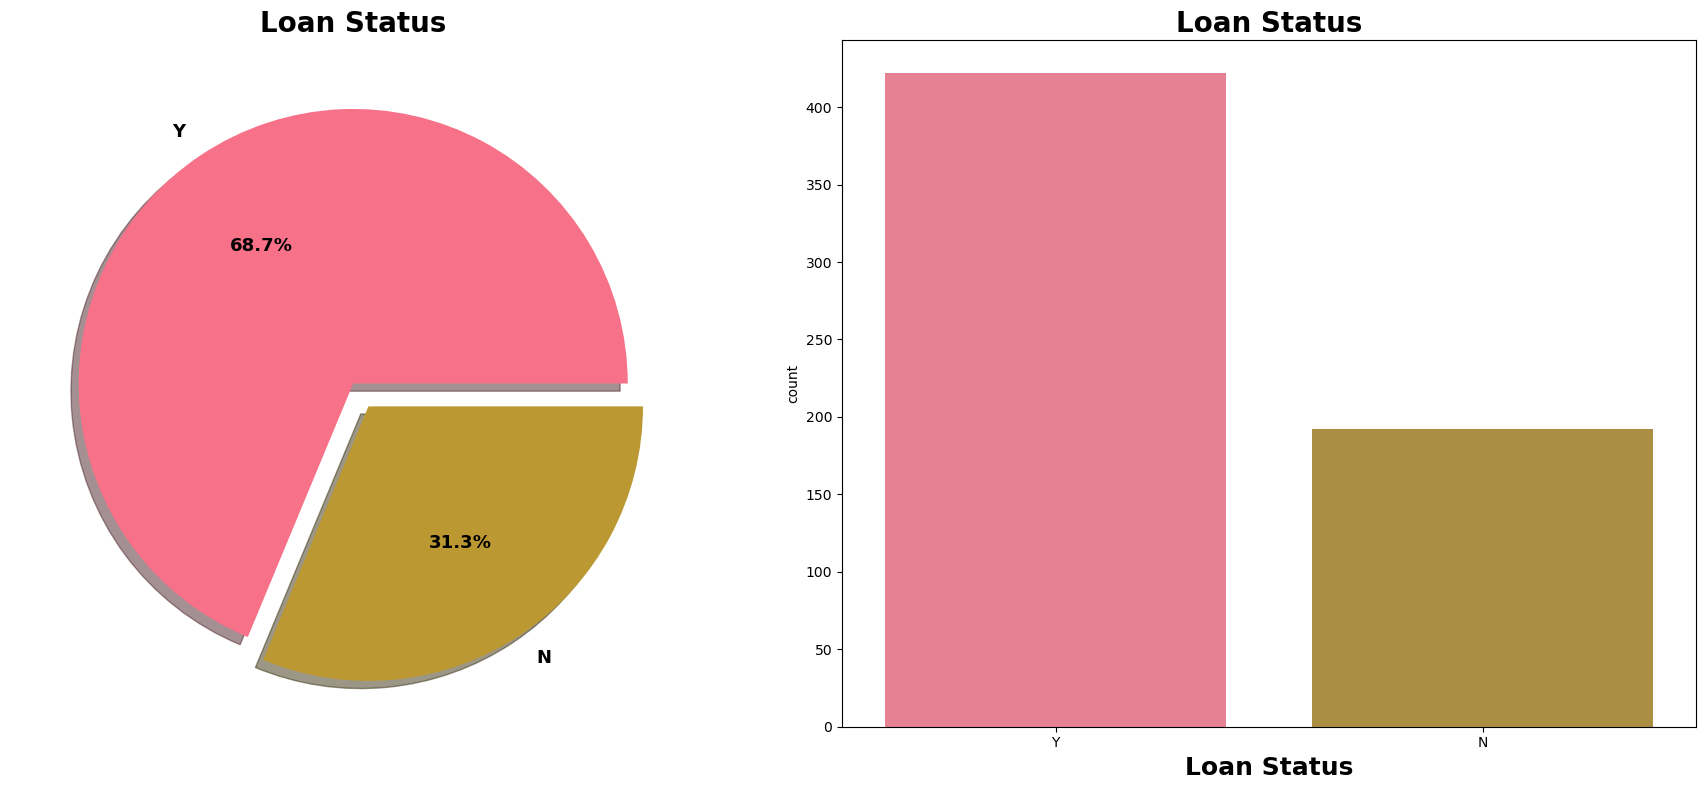

In [29]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
ds['Loan_Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Loan Status', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Loan_Status',data=ds,ax=ax[1])
ax[1].set_title('Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Loan Status",fontsize=18,fontweight ='bold')
plt.show()

# Observations

68.7% of applicants are approved for loans.

We can observe how uneven the dataset is.

# Married vs Laon status

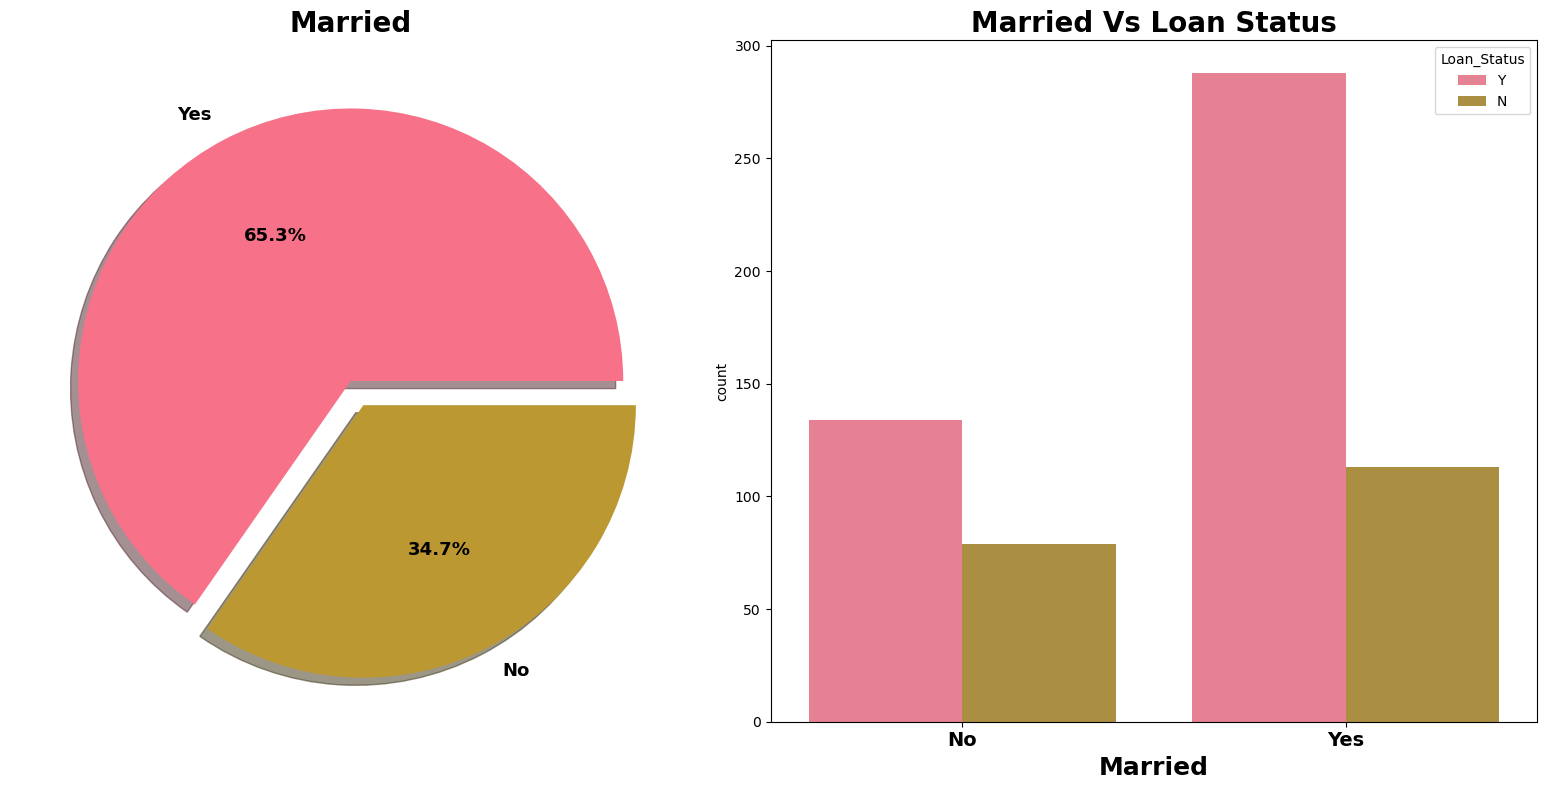

In [31]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
ds['Married'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Married', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Married',hue="Loan_Status",data=ds,ax=ax[1])
ax[1].set_title('Married Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Married",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [32]:
pd.crosstab([ds['Gender'],ds['Married']],[ds.Loan_Status],margins=True).style.background_gradient(cmap='summer_r')

# Observations:
    
65.3% of those requesting loans are married. The Count plot demonstrates that married persons have a higher chance of being approved for a loan.

But now for the intriguing crosstab observation:

Compared to married women, single women have a higher likelihood of obtaining a loan approved.We'll try to determine which factor—such as education, employment, or income—really makes a difference in this situation.

Married men had higher odds of getting a loan approved.

# Gender Vs Loan Status

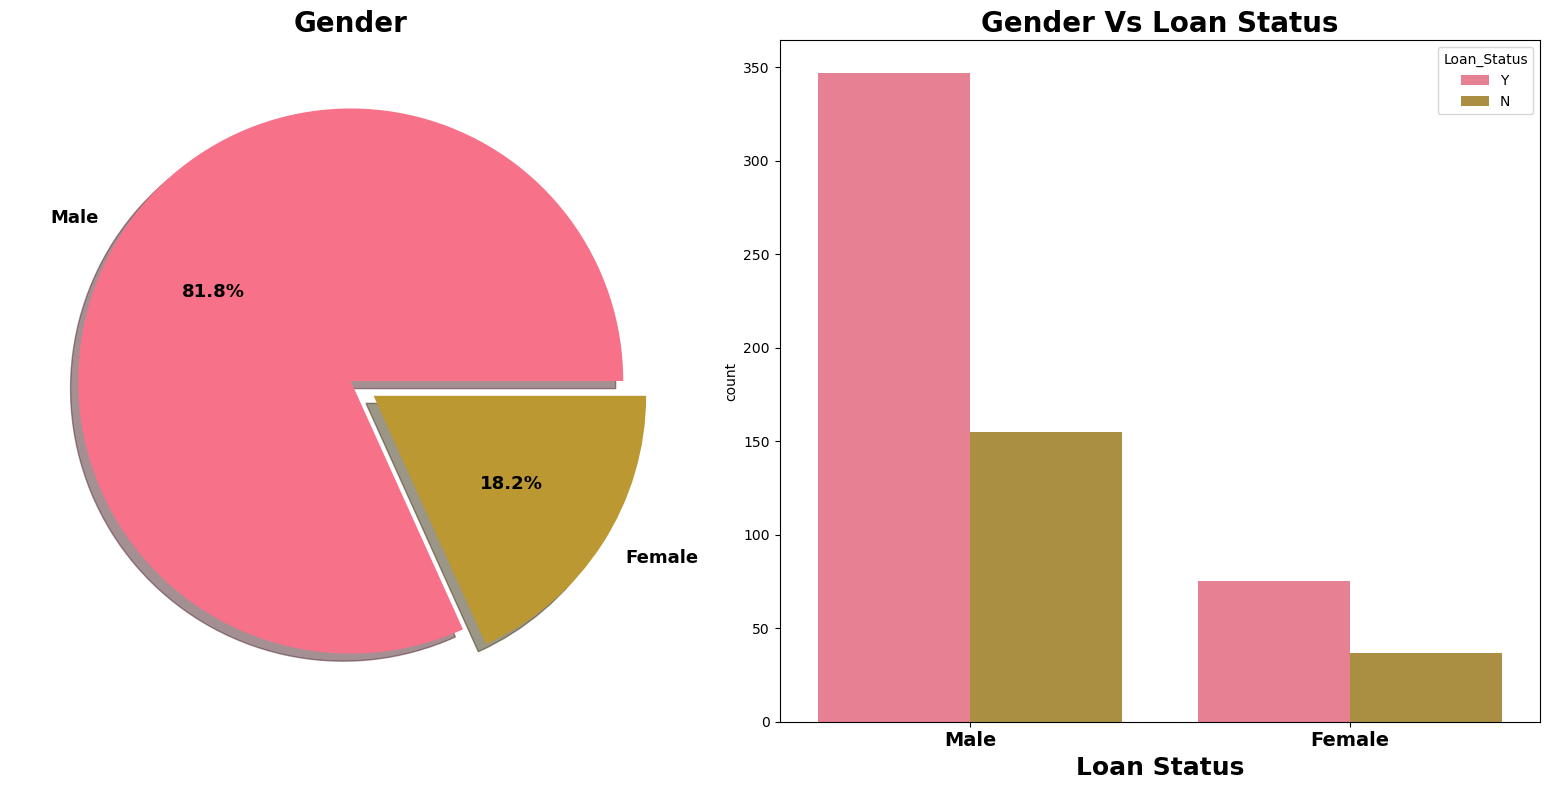

In [33]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
ds['Gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Gender', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Gender',hue="Loan_Status",data=ds,ax=ax[1])
ax[1].set_title('Gender Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Loan Status",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [34]:
pd.crosstab(ds['Gender'],ds["Loan_Status"], margins=True).style.background_gradient(cmap='summer_r')

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


# Observations

There are 81.8% male applicants.

65% of loan applications, regardless of gender, are approved.This indicates that gender has no bearing on loan acceptance. No distinction was made based on gender or name.

# Dependents vs Loan Status

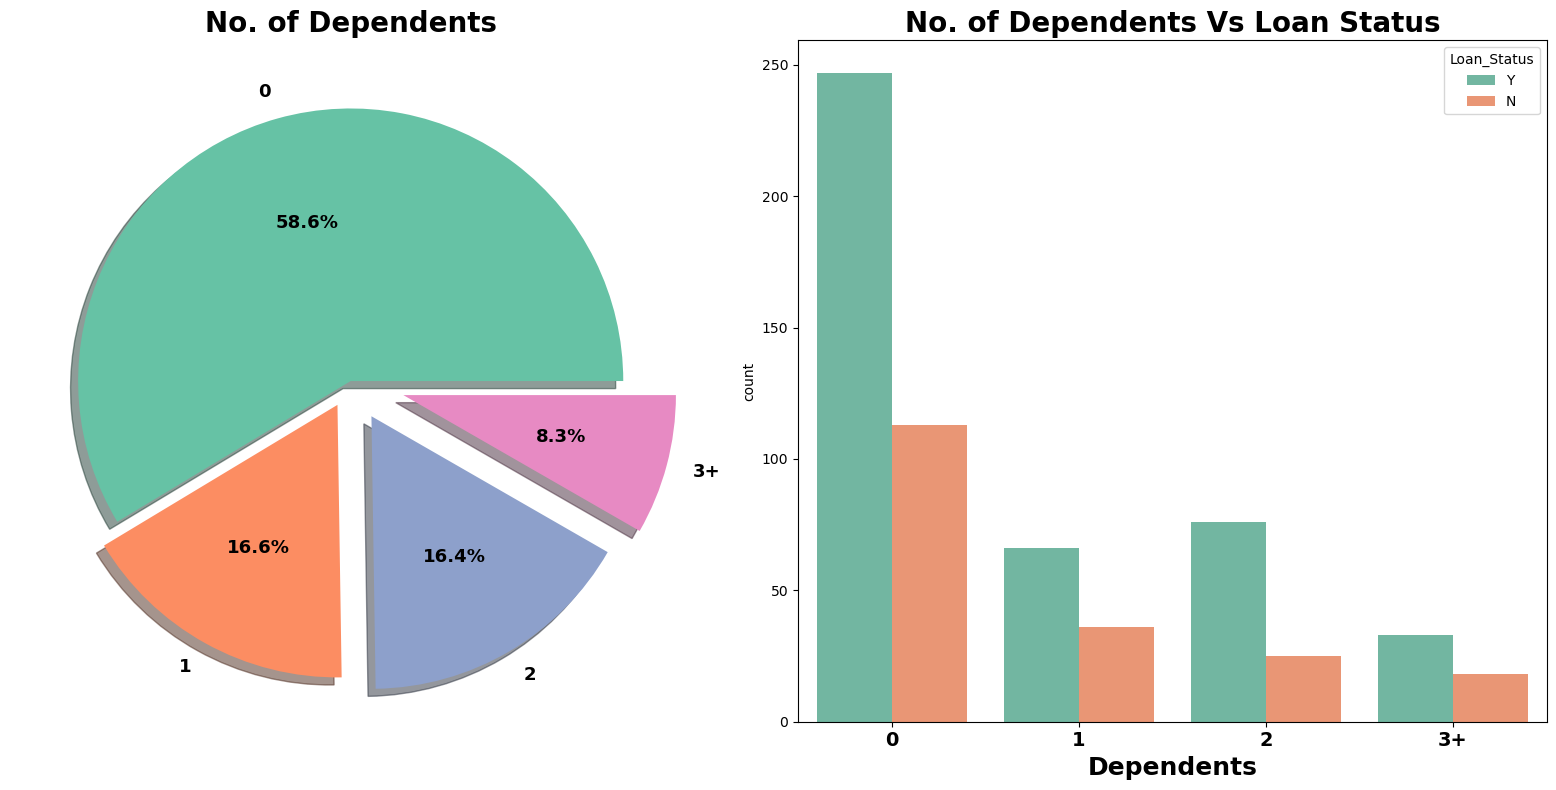

In [35]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2')
f,ax=plt.subplots(1,2,figsize=(16,8))
ds['Dependents'].value_counts().plot.pie(explode=[0,0.1,0.15,0.2],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('No. of Dependents', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Dependents',hue="Loan_Status",data=ds,ax=ax[1])
ax[1].set_title('No. of Dependents Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Dependents",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [37]:
pd.crosstab([ds['Dependents']],[ds.Loan_Status,ds['Gender']],margins=True).style.background_gradient(cmap='winter_r')

In [40]:
pd.crosstab([ds['Dependents'],ds['Gender']],[ds.Loan_Status],margins=True).style.background_gradient(cmap='rainbow_r')

# Observations

58.6% of applicants do not have any dependents.One or two dependents make up 33% of applicants. It will be interesting to see if the amount of the loan required increases with the number of dependents.

Compared to women who have dependents, women with no dependents had higher acceptance rates for loans.

Maximum loan approval for men is followed by 2 dependents, then 0 dependents.

# Education vs Loan Status

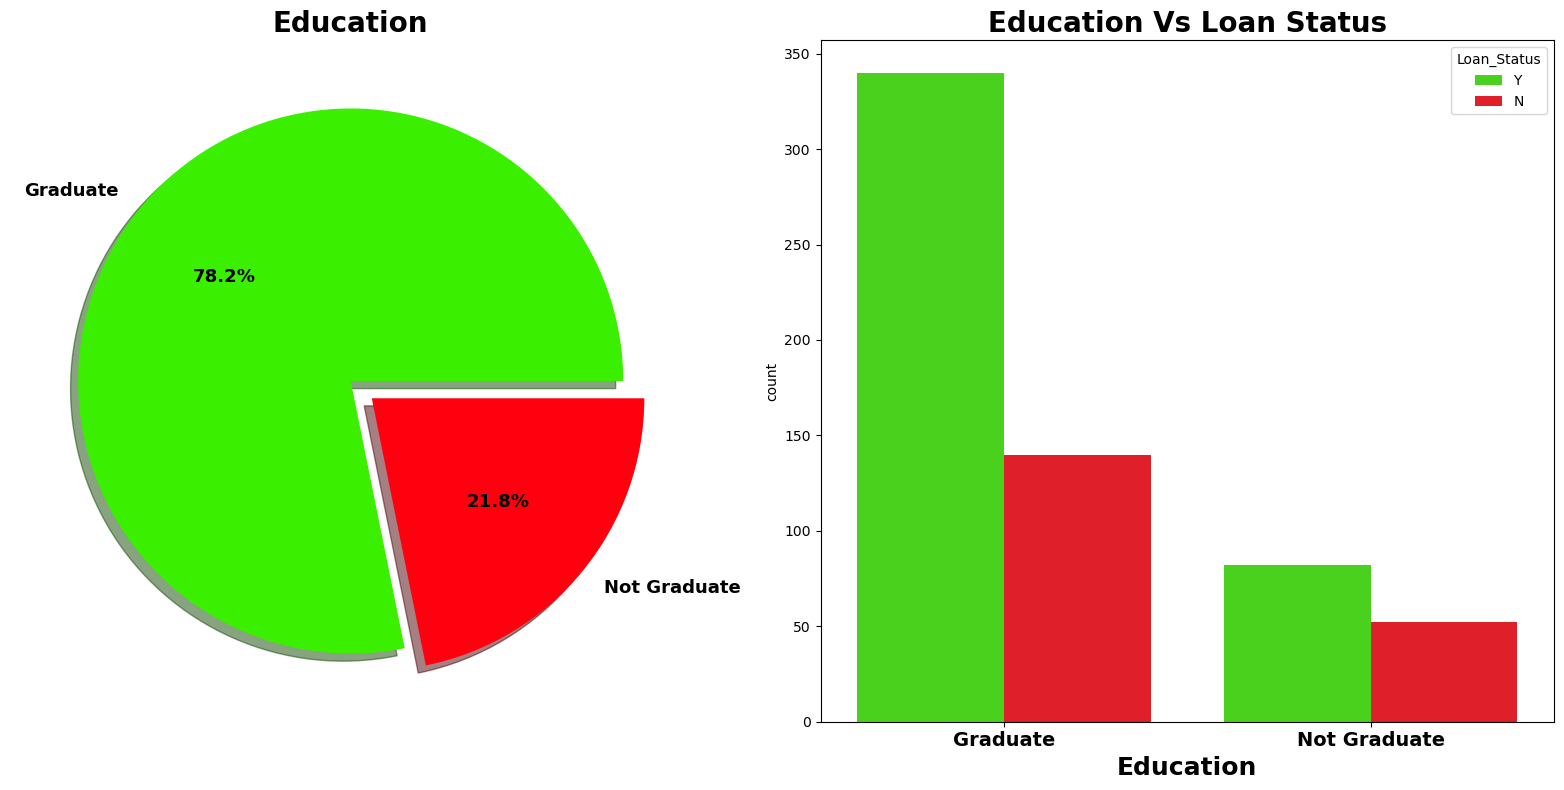

In [41]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('prism')
f,ax=plt.subplots(1,2,figsize=(16,8))
ds['Education'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Education', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Education',hue="Loan_Status",data=ds,ax=ax[1])
ax[1].set_title('Education Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Education",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()


In [44]:
 pd.crosstab([ds['Education'],ds['Gender']],[ds.Loan_Status],margins=True).style.background_gradient(cmap='nipy_spectral')

# Observations:
    
Graduate candidates have a higher chance of being approved for a loan, regardless of gender.

In [46]:
ds.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Self Employed Vs Loan Status

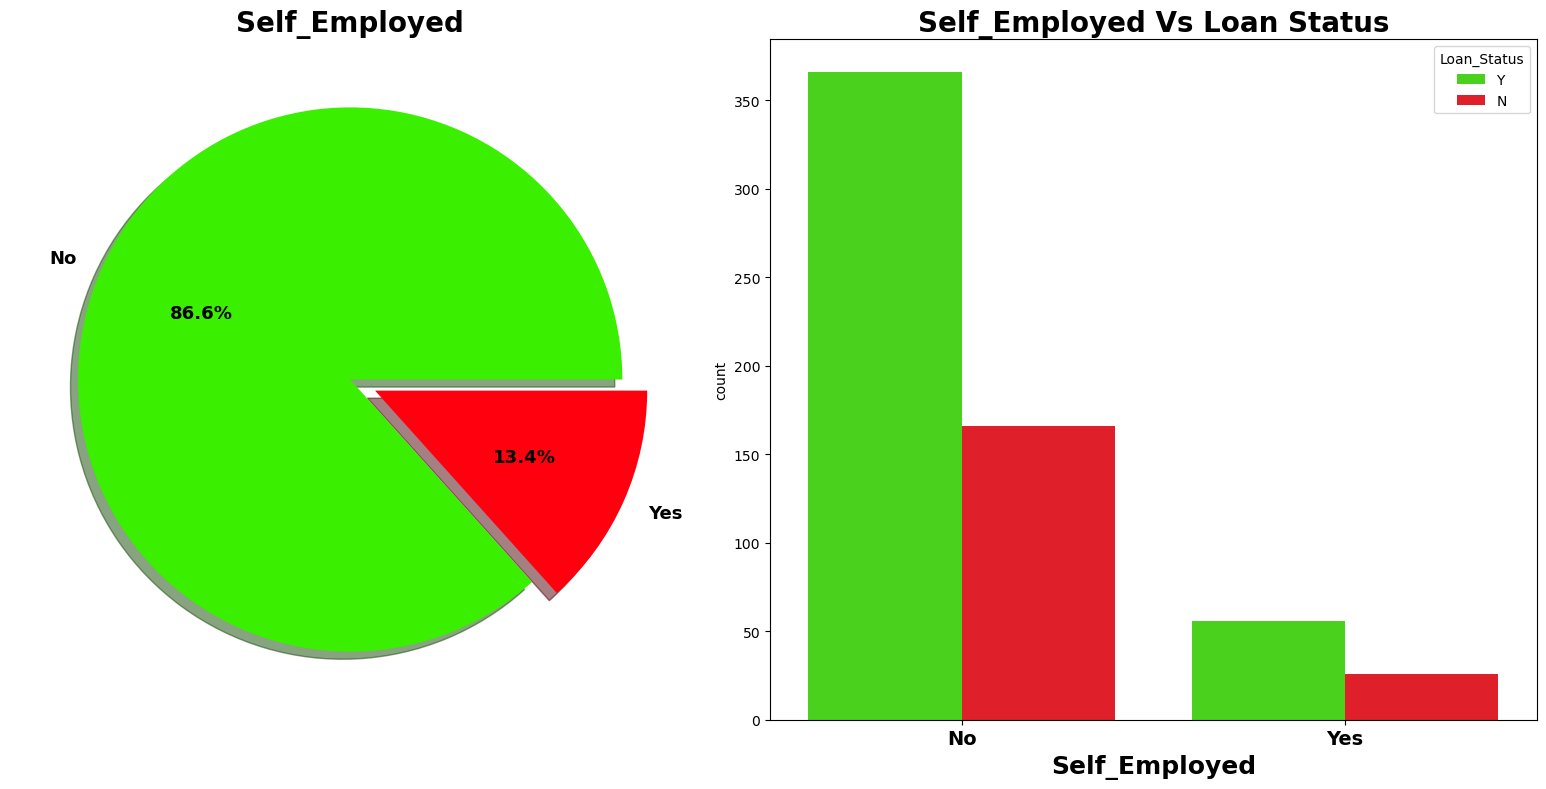

In [50]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('prism')
f,ax=plt.subplots(1,2,figsize=(16,8))
ds['Self_Employed'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Self_Employed', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Self_Employed',hue="Loan_Status",data=ds,ax=ax[1])
ax[1].set_title('Self_Employed Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Self_Employed",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()


In [49]:
pd.crosstab([ds['Self_Employed'],ds['Gender']],[ds.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

In [53]:


Cat=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']



In [57]:
# Using Label Encoder on categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Cat:
    ds[i] = le.fit_transform(ds[i])
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


# Outliers Treatment

In [58]:
Num =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

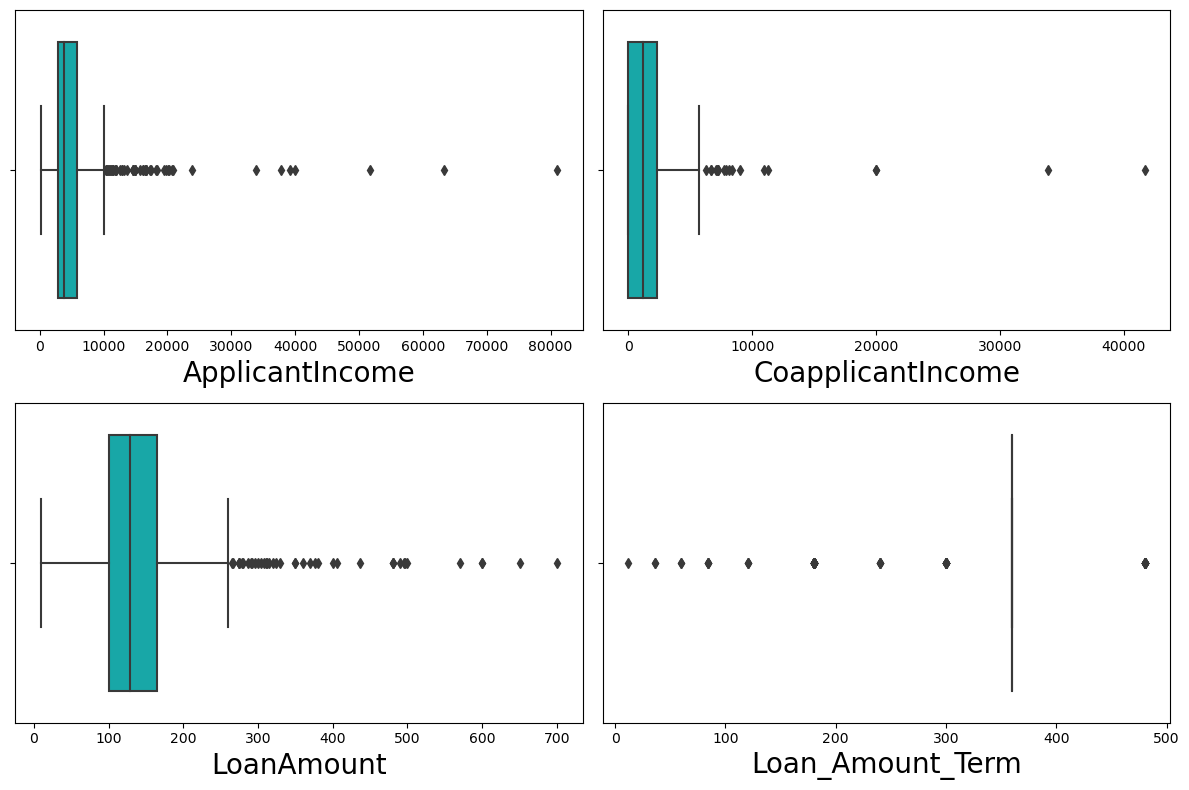

In [59]:
plt.figure(figsize=(12,8),facecolor='white')
plotnumber=1

for column in Num:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(ds[column],color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

By observing the plot we can notice that outliers exists in these data

In [60]:
ds.drop(["Loan_ID"], axis=1, inplace=True) #Not required

In [61]:
ds.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [62]:
ds['Dependents'] = ds.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [63]:
ds['Dependents'] =pd.to_numeric(ds['Dependents'])

In [66]:
from scipy.stats import zscore
z = np.abs(zscore(ds))
threshold = 3
ds1 = ds[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", ds.shape)
print ("Shape of the dataframe after removing outliers: ", ds1.shape)
print ("Percentage of data loss after outlier removal: ", (ds.shape[0]-ds1.shape[0])/ds.shape[0]*100)

ds=ds1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (577, 12)
Percentage of data loss post outlier removal:  6.026058631921824


As we can observe six percent of the data is lost by removing the outliers

It lies within a acceptable limets

# Checking skewness of the features

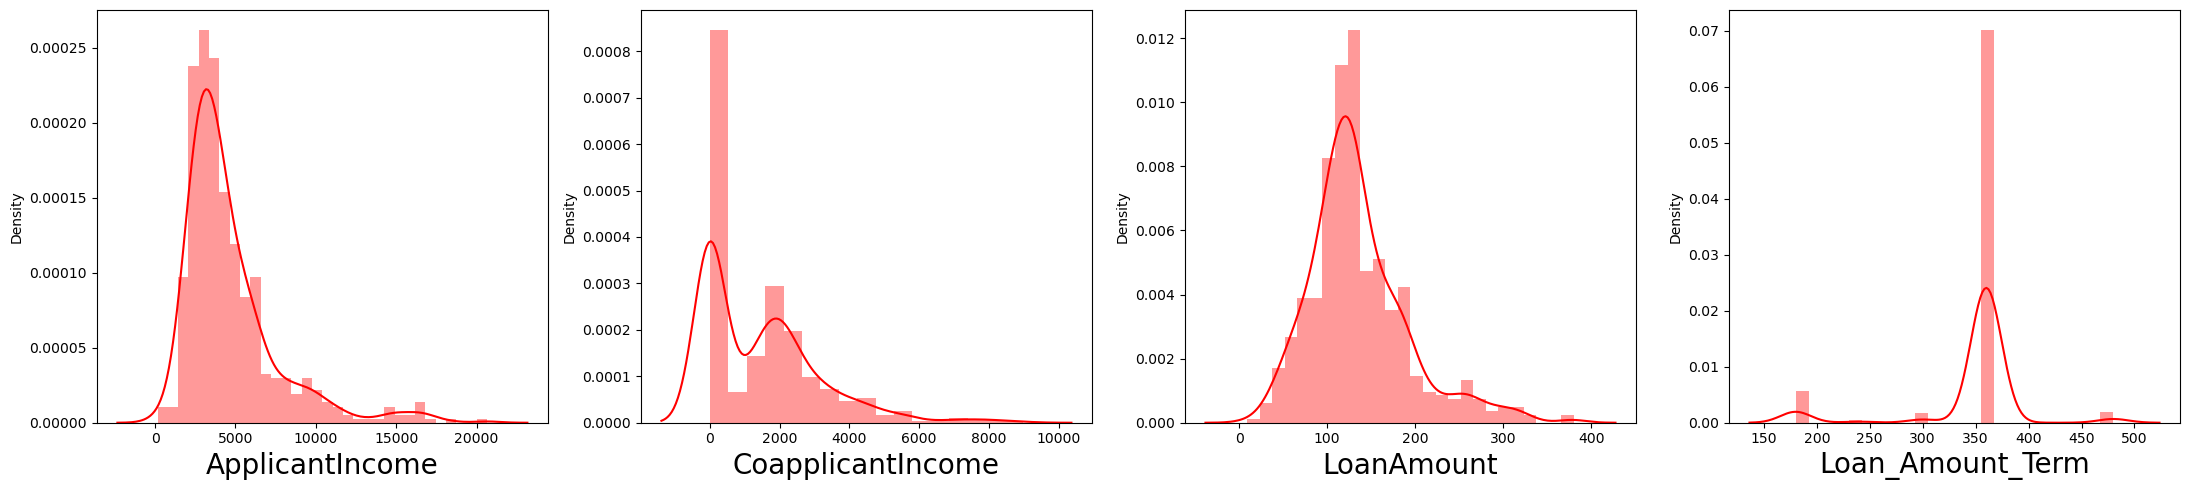

In [67]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in Num:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(ds[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [68]:
ds.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

# Observation

Out of all the features listed above, the numerical features "ApplicantIncome," "CoapplicantIncome," and "LoanAmount" are skewed.

Skewness has nothing to do with the other attributes because the other features are categorical in nature.They won't matter to us.

Way Forward

Yeo-Johnson transformation technique will be used.

In [69]:
# Using yeo-johnson  method to get better prediction
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [72]:
ds[skew] = scaler.fit_transform(ds[skew].values)
ds[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


Again Checking the skewness

In [74]:
ds.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

# Now we are moving forward 

# Correlation Matrix

In [76]:
ds.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.027392,1.000000,-0.008121,0.560936


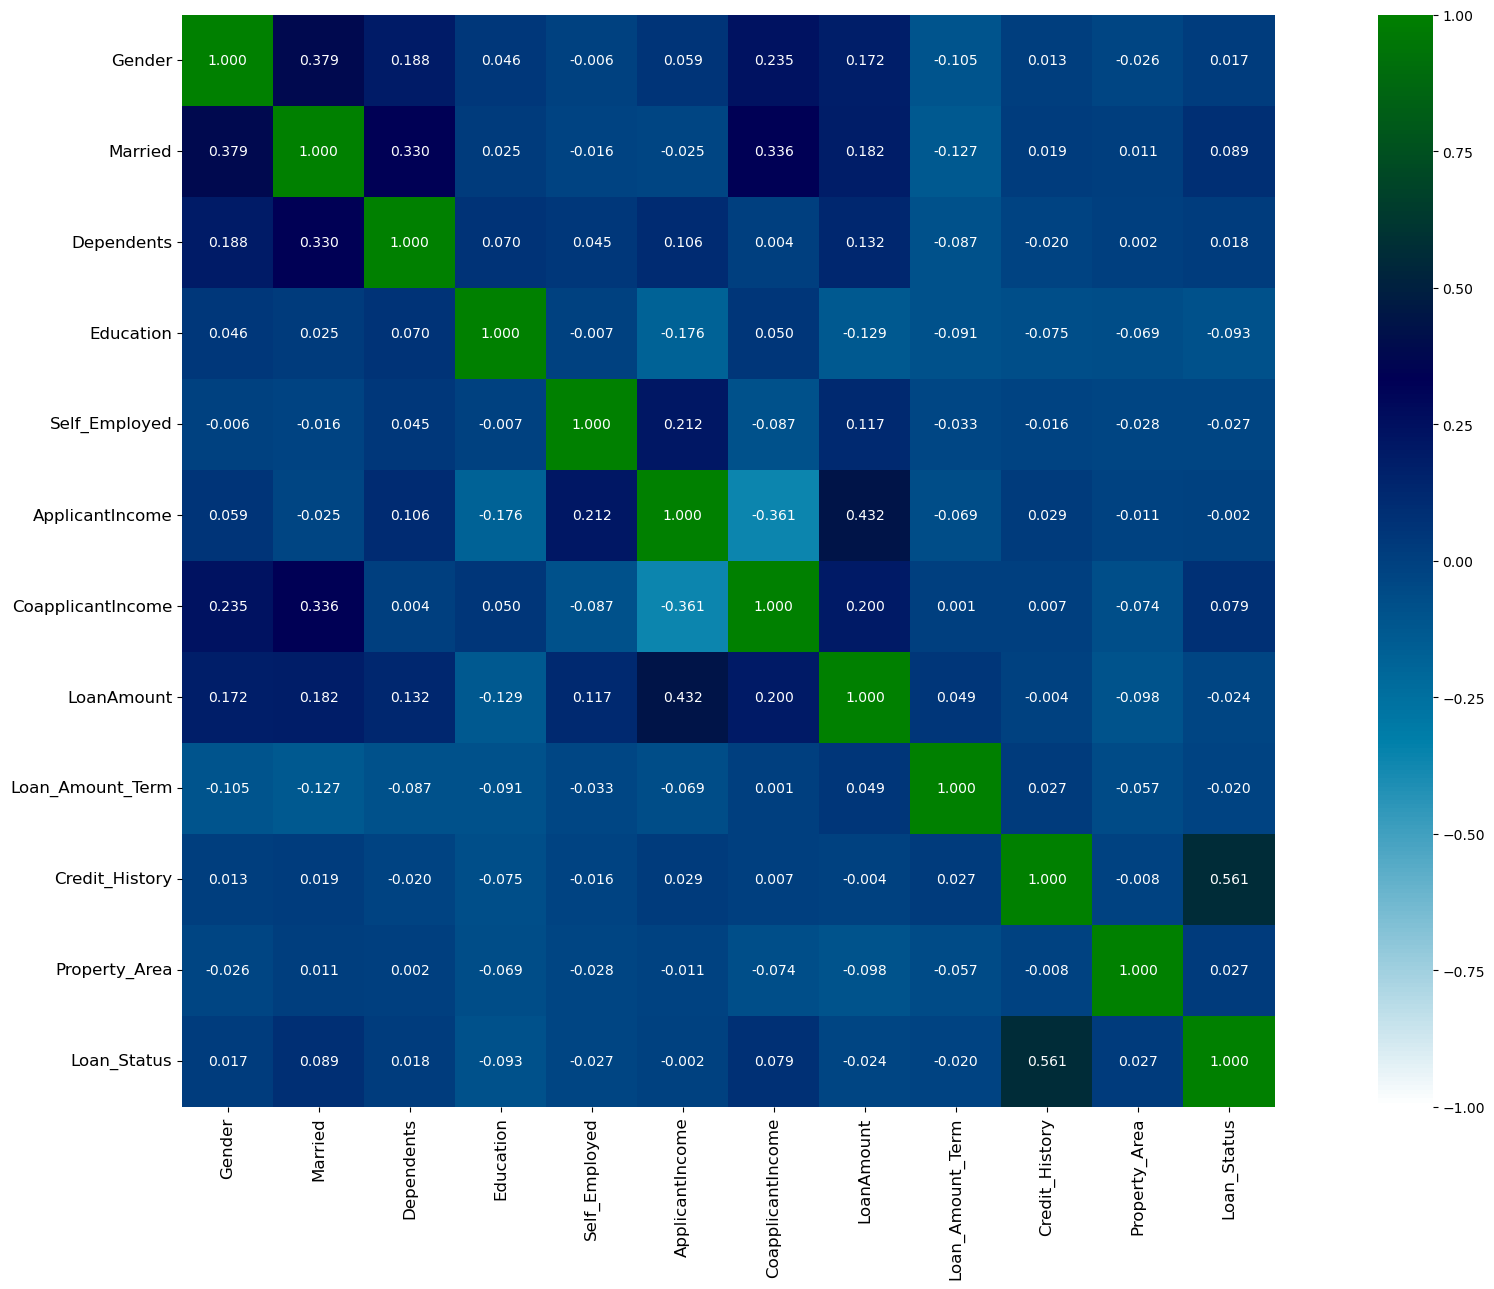

In [80]:
plt.figure(figsize=(21,13))
sns.heatmap(ds.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="ocean_r")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

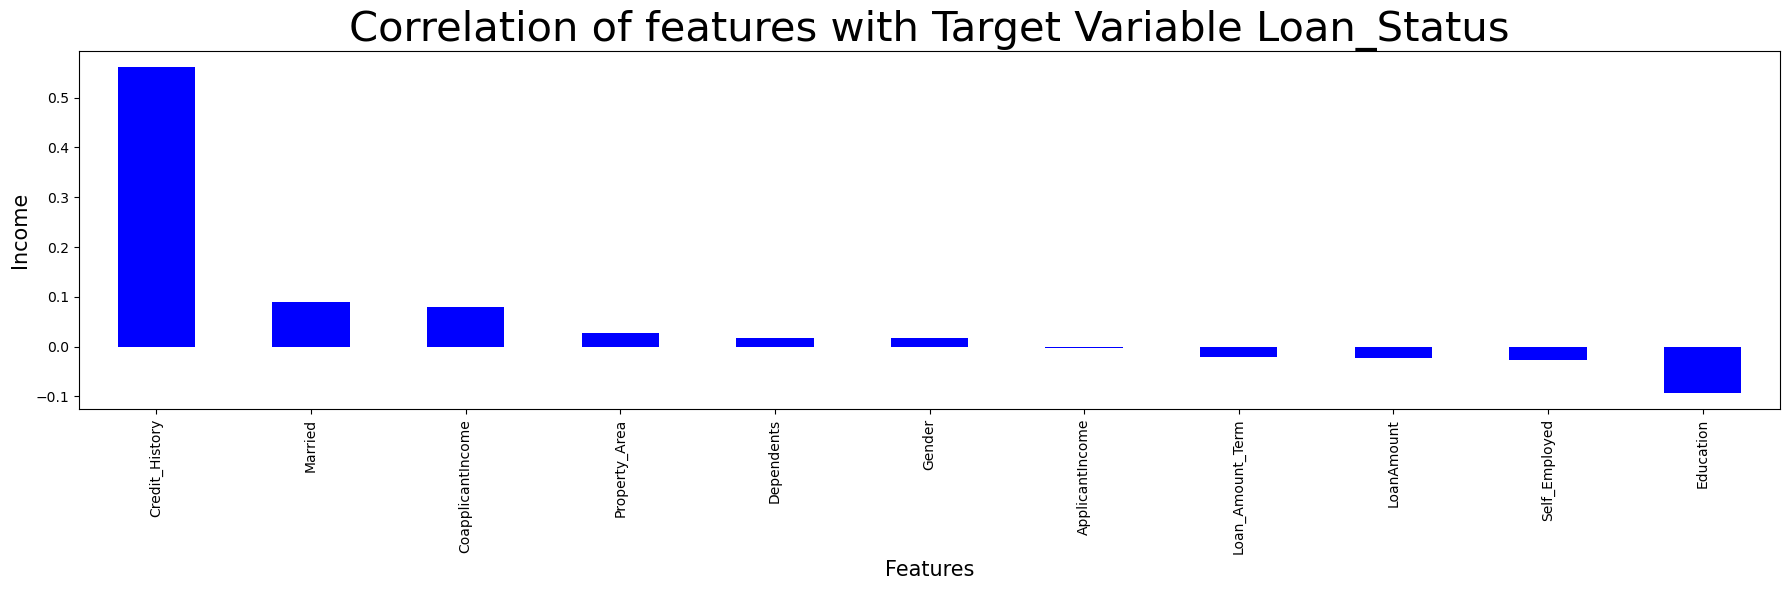

In [86]:
plt.figure(figsize = (18,6))
ds.corr()['Loan_Status'].drop(['Loan_Status']).sort_values(ascending=False).plot(kind='bar',color = 'Blue')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation of features with Target Variable Loan_Status',fontsize = 30)
plt.show()

# Observations: 

Except for Credit History, the most of features have weak to moderate correlations with the target variable.

The relationship between credit history and loan status has a maximum correlation of 0.561.

# Now lets check the multicollinerity using vif

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(ds.values,i) for i in range(ds.shape[1])]
vif['Features']= ds.columns
vif

,VIF,Features
0,6.119789,Gender
1,3.963538,Married
2,1.778377,Dependents
3,1.355469,Education
4,1.197219,Self_Employed
5,1.756726,ApplicantIncome
6,1.596438,CoapplicantIncome
7,1.548450,LoanAmount
8,10.415255,Loan_Amount_Term
9,9.483180,Credit_History


# Most of the features are in the permissible limits

Now we need to check the imbalance in the target variable

In [90]:
ds.Loan_Status.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [91]:
#Using SMOTE
from imblearn.over_sampling import SMOTE
# Splitting data in target and dependent feature
X = ds.drop(['Loan_Status'], axis =1)
Y = ds['Loan_Status']
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)
Y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

# Observation:


The class unbalanced issue has been effectively rectified, and as all the categories now have the same data, the ML model is not biassed towards any one category.

In [92]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# ML Model Building

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (557, 11)
Training target vector size: (557,)
Test feature matrix size: (239, 11)
Test target vector size: (239,)


In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8158995815899581 on Random_state 93


# LR Model

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=78, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8117154811715481


Confusion matrix of Logistics Regression : 
 [[ 75  35]
 [ 10 119]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.88      0.68      0.77       110
           1       0.77      0.92      0.84       129

    accuracy                           0.81       239
   macro avg       0.83      0.80      0.81       239
weighted avg       0.82      0.81      0.81       239



In [97]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for n in range(25):
    n = n+1
    model = neighbors.KNeighborsClassifier(n_neighbors = n)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for n= ' , n , 'is:', error)

RMSE value for n=  1 is: 0.47091116165974684
RMSE value for n=  2 is: 0.4968520148758506
RMSE value for n=  3 is: 0.50104493321917
RMSE value for n=  4 is: 0.5294664560040351
RMSE value for n=  5 is: 0.4968520148758506
RMSE value for n=  6 is: 0.5052030537546389
RMSE value for n=  7 is: 0.47971400126799746
RMSE value for n=  8 is: 0.4968520148758506
RMSE value for n=  9 is: 0.4840553929365547
RMSE value for n=  10 is: 0.4883581921595791
RMSE value for n=  11 is: 0.5052030537546389
RMSE value for n=  12 is: 0.50104493321917
RMSE value for n=  13 is: 0.4753329597178616
RMSE value for n=  14 is: 0.4840553929365547
RMSE value for n=  15 is: 0.4619406036915484
RMSE value for n=  16 is: 0.4840553929365547
RMSE value for n=  17 is: 0.4753329597178616
RMSE value for n=  18 is: 0.49262341019056577
RMSE value for n=  19 is: 0.47091116165974684
RMSE value for n=  20 is: 0.4840553929365547
RMSE value for n=  21 is: 0.4753329597178616
RMSE value for n=  22 is: 0.47091116165974684
RMSE value for n= 

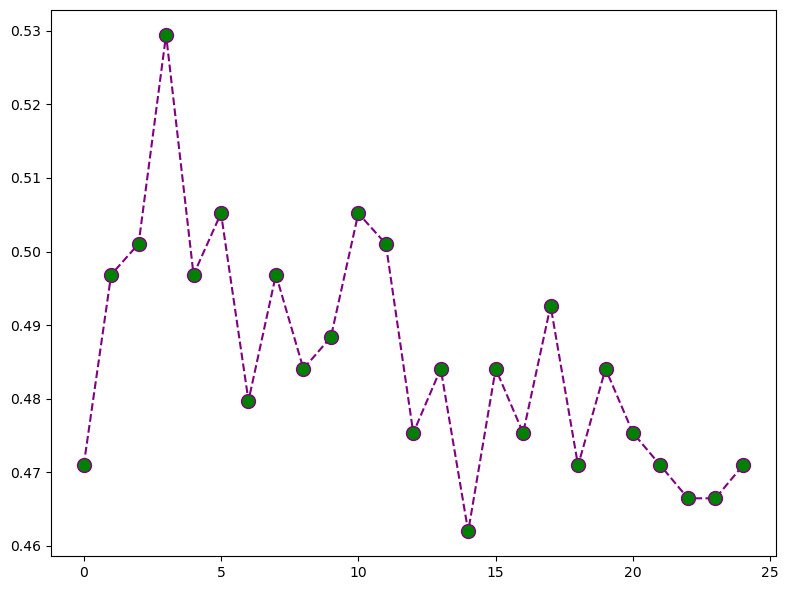

In [99]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(25), rmse_val, color='Purple', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

# Observations:
    
The minimal RMSE value, which is around 0.44814821218396267 for k=3, increases when k is increased further. We can confidently state that k=3 will provide the best outcome in this scenario.

# Other Classification Algo

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.7907949790794979


Confusion matrix : 
 [[ 75  35]
 [ 15 114]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.68      0.75       110
           1       0.77      0.88      0.82       129

    accuracy                           0.79       239
   macro avg       0.80      0.78      0.79       239
weighted avg       0.80      0.79      0.79       239





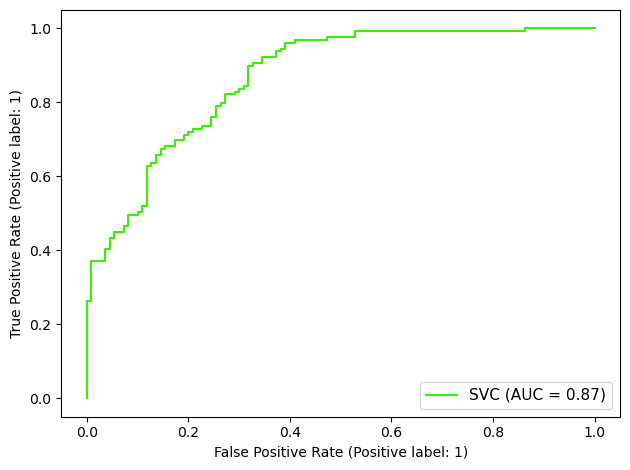

Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.7907949790794979


Confusion matrix : 
 [[ 68  42]
 [  8 121]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.62      0.73       110
           1       0.74      0.94      0.83       129

    accuracy                           0.79       239
   macro avg       0.82      0.78      0.78       239
weighted avg       0.81      0.79      0.78       239





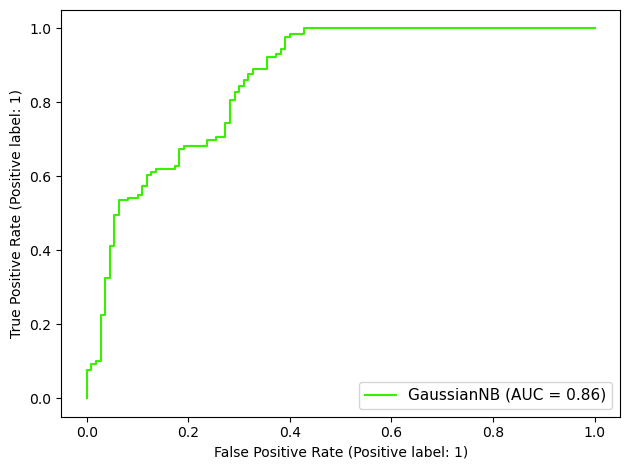

Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy Score :
 0.799163179916318


Confusion matrix : 
 [[ 90  20]
 [ 28 101]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       110
           1       0.83      0.78      0.81       129

    accuracy                           0.80       239
   macro avg       0.80      0.80      0.80       239
weighted avg       0.80      0.80      0.80       239





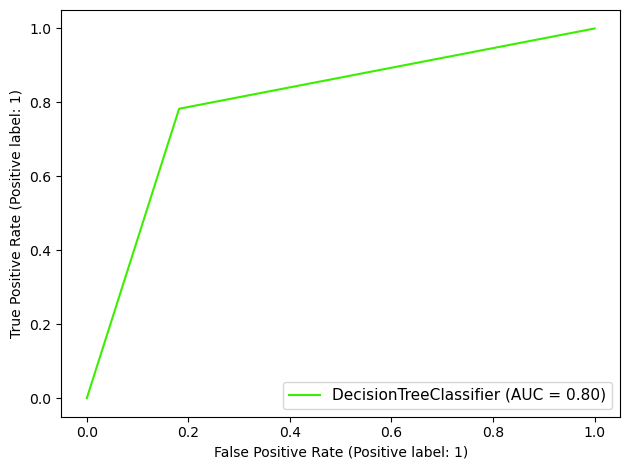

Classification ML Algorithm Evaluation Matrix KNeighborsClassifier(n_neighbors=3) is


Accuracy Score :
 0.7489539748953975


Confusion matrix : 
 [[85 25]
 [35 94]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.71      0.77      0.74       110
           1       0.79      0.73      0.76       129

    accuracy                           0.75       239
   macro avg       0.75      0.75      0.75       239
weighted avg       0.75      0.75      0.75       239





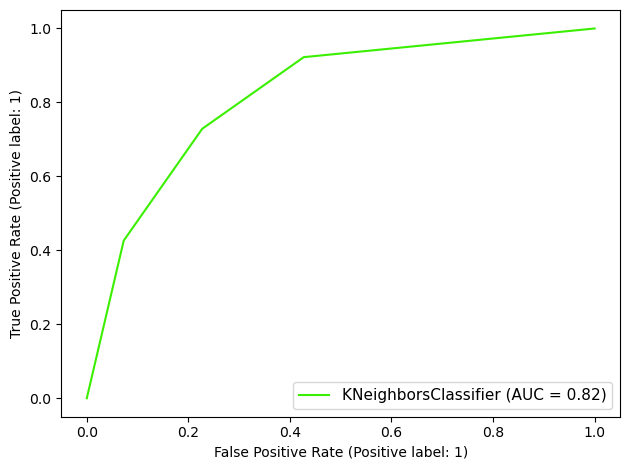

Classification ML Algorithm Evaluation Matrix RandomForestClassifier() is


Accuracy Score :
 0.8577405857740585


Confusion matrix : 
 [[ 92  18]
 [ 16 113]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       110
           1       0.86      0.88      0.87       129

    accuracy                           0.86       239
   macro avg       0.86      0.86      0.86       239
weighted avg       0.86      0.86      0.86       239





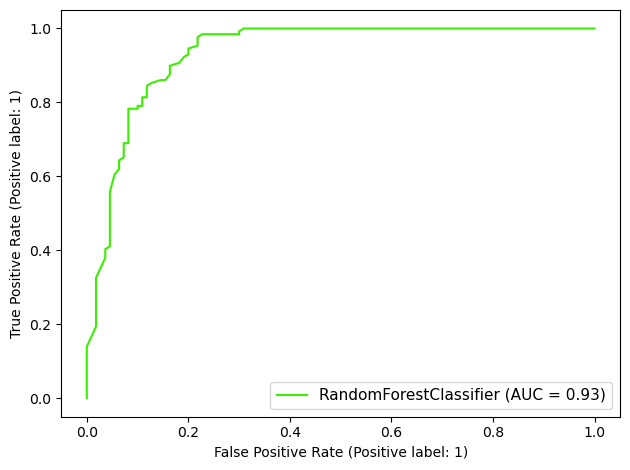

Classification ML Algorithm Evaluation Matrix ExtraTreesClassifier() is


Accuracy Score :
 0.8451882845188284


Confusion matrix : 
 [[ 91  19]
 [ 18 111]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       110
           1       0.85      0.86      0.86       129

    accuracy                           0.85       239
   macro avg       0.84      0.84      0.84       239
weighted avg       0.85      0.85      0.85       239





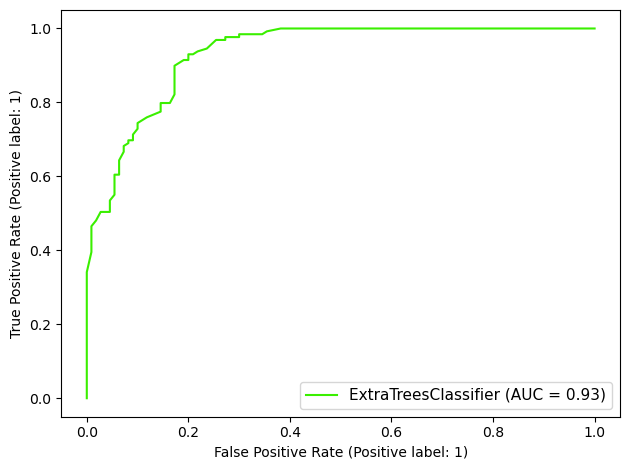

In [100]:
from sklearn.metrics import plot_roc_curve
model=[ 
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    disp = plot_roc_curve(m,X_test,Y_test)   
    plt.legend(prop={'size':11}, loc='lower right')
    plt.show()

# Crossvalidation

In [101]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('*'*80)



Cross Validation Score LogisticRegression() :

Score : [0.7        0.73584906 0.77987421 0.73584906 0.77358491]
Mean Score : 0.7450314465408805
Std deviation : 0.029071574460225888
********************************************************************************


Cross Validation Score SVC() :

Score : [0.70625    0.73584906 0.79874214 0.77987421 0.79245283]
Mean Score : 0.7626336477987422
Std deviation : 0.03574010047897933
********************************************************************************


Cross Validation Score GaussianNB() :

Score : [0.6875     0.72955975 0.81132075 0.69811321 0.80503145]
Mean Score : 0.7463050314465409
Std deviation : 0.05241512037526921
********************************************************************************


Cross Validation Score DecisionTreeClassifier() :

Score : [0.70625    0.76100629 0.78616352 0.7672956  0.81761006]
Mean Score : 0.7676650943396227
Std deviation : 0.03647734018619033
***********************************************

# Gridsearch CV

In [102]:
from sklearn.model_selection import GridSearchCV
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [103]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.750 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.661 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.739 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.739 total time=   0.0s
[CV 5

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier model
Final_mod = RandomForestClassifier(bootstrap=True, criterion='entropy', n_estimators=50, max_depth=20, max_features='auto')

# Fit the model on the training data
Final_mod.fit(X_train, Y_train)

# Predict the target variable for the test data
y_pred = Final_mod.predict(X_test)

# Calculate and print the accuracy score
print('\033[1m' + 'Accuracy Score:' + '\033[0m')
accuracy = accuracy_score(Y_test, y_pred)
print(accuracy)


Accuracy Score:
0.8661087866108786


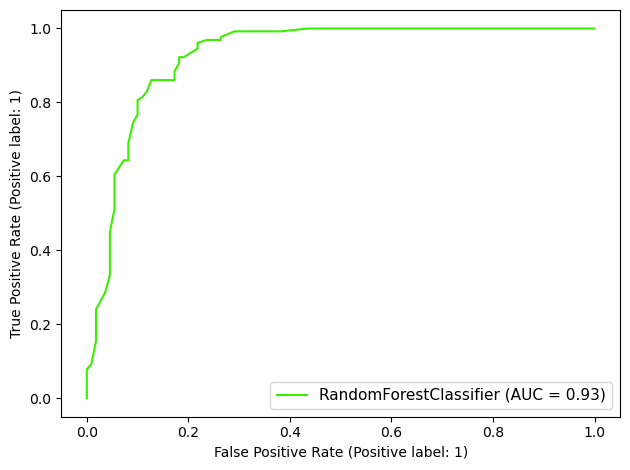

<Figure size 1000x1000 with 0 Axes>

AUC Score:
0.9270965468639888


In [106]:
from sklearn.metrics import plot_roc_curve, roc_auc_score
# Plot the ROC curve
disp = plot_roc_curve(Final_mod, X_test, Y_test)
plt.legend(prop={'size': 11}, loc='lower right')
plt.figure(figsize=(10, 10))
plt.show()

# Calculate and print the AUC score
y_pred_proba = Final_mod.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(Y_test, y_pred_proba)
print('\033[1m' + 'AUC Score:' + '\033[0m')
print(auc_score)


In [107]:
#Saving Model
import joblib
joblib.dump(Final_mod,'Loan_Status_Final.pkl')

['Loan_Status_Final.pkl']